In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
import sys
sys.path.append("C:\python\Project Work 4")

In [54]:
print(sys.path)

['c:\\python\\Project Work 4', "c:\\Users\\Nithin'\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip", "c:\\Users\\Nithin'\\AppData\\Local\\Programs\\Python\\Python39\\DLLs", "c:\\Users\\Nithin'\\AppData\\Local\\Programs\\Python\\Python39\\lib", "c:\\Users\\Nithin'\\AppData\\Local\\Programs\\Python\\Python39", '', "c:\\Users\\Nithin'\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages", "c:\\Users\\Nithin'\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32", "c:\\Users\\Nithin'\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32\\lib", "c:\\Users\\Nithin'\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\Pythonwin", "c:\\Users\\Nithin'\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\IPython\\extensions", "C:\\Users\\Nithin'\\.ipython", 'C:\\python\\Project Work 4', 'C:\\python\\Project Work 4']


In [55]:
from pymongo_test_insert import get_database
dbname = get_database()

collection_name = dbname["reports"]

report_details = collection_name.find({},{"_id":0,"userId":0,"__v":0})
reports=[]
for item in report_details:
    reports.append(item)

In [56]:
dfnew = pd.json_normalize(reports)
dfnew

,AbnormalHairShaft,Age,Dandruff,Hairfall,Name,ReportYear,SerumFerritin,SerumIron,SerumZn,TSH,Gender
0,1,21,1,1,Parjanya Modi,2022.0,201.39,12.71,29.7,0.63,M
1,1,22,1,1,Modi,NaN,100.00,30.00,50.0,9.00,M
2,0,30,0,1,Vijayeshjeevan,NaN,200.00,99.00,30.0,100.50,M
3,0,23,0,1,Modi,NaN,100.00,20.00,190.0,2.00,M


In [57]:
df = pd.read_csv('New Hair Fall Data Set.csv')

In [58]:
df=pd.concat([df,dfnew],axis=0)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3460 entries, 0 to 3
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3460 non-null   object 
 1   Age                3460 non-null   int64  
 2   Gender             3460 non-null   object 
 3   ReportYear         3457 non-null   float64
 4   SerumIron          3398 non-null   float64
 5   SerumFerritin      3399 non-null   float64
 6   SerumZn            3397 non-null   float64
 7   TSH                3399 non-null   float64
 8   AbnormalHairShaft  3460 non-null   int64  
 9   Dandruff           3460 non-null   int64  
 10  Hairfall           3460 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 324.4+ KB


In [60]:
df=df.drop('Name',axis=1)

In [61]:
df.head()

,Age,Gender,ReportYear,SerumIron,SerumFerritin,SerumZn,TSH,AbnormalHairShaft,Dandruff,Hairfall
0,41,M,2017.0,NaN,NaN,NaN,NaN,0,0,1
1,39,M,2015.0,162.71,201.39,29.46,0.63,1,0,0
2,22,F,2017.0,104.79,87.68,82.50,2.70,0,0,0
3,25,M,2017.0,72.65,37.93,91.91,3.26,0,0,0
4,37,M,2017.0,173.04,30.50,184.93,4.18,0,0,1


In [62]:
df[(df['TSH'] > 0.5) & (df['TSH'] < 5)].count()['Hairfall']

2729

Replacing nan values in each column with nan values

In [63]:
df.loc[(df['Gender']=='M') & (df['SerumIron'].isnull()),'SerumIron']=130

In [64]:
df[(df['Gender']=='M')]['SerumIron']

0       130.00
1       162.71
3        72.65
4       173.04
14      106.71
         ...  
3452     95.15
0        12.71
1        30.00
2        99.00
3        20.00
Name: SerumIron, Length: 1492, dtype: float64

In [65]:
df.loc[(df['Gender']=='F') & (df['SerumIron'].isnull()),'SerumIron']=110

In [66]:
df[(df['Gender']=='F')]['SerumIron']

2       104.79
5        71.89
6       181.49
7        66.44
8        95.59
         ...  
3449    143.62
3451    114.80
3453    135.27
3454    178.69
3455     73.67
Name: SerumIron, Length: 1968, dtype: float64

In [67]:
df.loc[(df['Gender']=='M') & (df['SerumFerritin'].isnull()),'SerumFerritin']=135
df[(df['Gender']=='M')]['SerumFerritin']

0       135.00
1       201.39
3        37.93
4        30.50
14       25.64
         ...  
3452    203.03
0       201.39
1       100.00
2       200.00
3       100.00
Name: SerumFerritin, Length: 1492, dtype: float64

In [68]:
df.loc[(df['Gender']=='F') & (df['SerumFerritin'].isnull()),'SerumFerritin']=65
df[(df['Gender']=='F')]['SerumFerritin']

2        87.68
5       104.68
6       125.24
7       112.25
8        79.69
         ...  
3449     16.25
3451     49.20
3453    114.79
3454     23.75
3455    116.68
Name: SerumFerritin, Length: 1968, dtype: float64

In [69]:
df['SerumZn']=df['SerumZn'].fillna(90)

In [70]:
df['TSH']=df['TSH'].fillna(2.75)

In [71]:
df.head()

,Age,Gender,ReportYear,SerumIron,SerumFerritin,SerumZn,TSH,AbnormalHairShaft,Dandruff,Hairfall
0,41,M,2017.0,130.00,135.00,90.00,2.75,0,0,1
1,39,M,2015.0,162.71,201.39,29.46,0.63,1,0,0
2,22,F,2017.0,104.79,87.68,82.50,2.70,0,0,0
3,25,M,2017.0,72.65,37.93,91.91,3.26,0,0,0
4,37,M,2017.0,173.04,30.50,184.93,4.18,0,0,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3460 entries, 0 to 3
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3460 non-null   int64  
 1   Gender             3460 non-null   object 
 2   ReportYear         3457 non-null   float64
 3   SerumIron          3460 non-null   float64
 4   SerumFerritin      3460 non-null   float64
 5   SerumZn            3460 non-null   float64
 6   TSH                3460 non-null   float64
 7   AbnormalHairShaft  3460 non-null   int64  
 8   Dandruff           3460 non-null   int64  
 9   Hairfall           3460 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 297.3+ KB


In [73]:
final_data=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [74]:
final_data=final_data.drop(['ReportYear'],axis=1)

In [75]:
final_data.head()

,Age,SerumIron,SerumFerritin,SerumZn,TSH,AbnormalHairShaft,Dandruff,Hairfall,Gender_M
0,41,130.00,135.00,90.00,2.75,0,0,1,1
1,39,162.71,201.39,29.46,0.63,1,0,0,1
2,22,104.79,87.68,82.50,2.70,0,0,0,0
3,25,72.65,37.93,91.91,3.26,0,0,0,1
4,37,173.04,30.50,184.93,4.18,0,0,1,1


In [76]:
final_data.describe()

,Age,SerumIron,SerumFerritin,SerumZn,TSH,AbnormalHairShaft,Dandruff,Hairfall,Gender_M
count,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000,3460.000000
mean,34.845954,110.623858,80.636818,85.831442,2.645634,0.258671,0.265896,0.393064,0.431214
std,9.072814,45.857846,61.754082,50.386560,2.675070,0.437967,0.441873,0.488501,0.495317
min,9.000000,12.000000,2.000000,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,79.275000,27.325000,41.200000,0.800000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,112.095000,73.825000,80.820000,1.960000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,146.837500,118.210000,110.850000,4.142500,1.000000,1.000000,1.000000,1.000000
max,56.000000,190.000000,520.000000,296.500000,100.500000,1.000000,1.000000,1.000000,1.000000


In [77]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3460 entries, 0 to 3
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3460 non-null   int64  
 1   SerumIron          3460 non-null   float64
 2   SerumFerritin      3460 non-null   float64
 3   SerumZn            3460 non-null   float64
 4   TSH                3460 non-null   float64
 5   AbnormalHairShaft  3460 non-null   int64  
 6   Dandruff           3460 non-null   int64  
 7   Hairfall           3460 non-null   int64  
 8   Gender_M           3460 non-null   uint8  
dtypes: float64(4), int64(4), uint8(1)
memory usage: 246.7 KB


In [78]:
import pandas_profiling as pp
pp.ProfileReport(final_data)

ImportError: cannot import name 'soft_unicode' from 'markupsafe' (c:\Users\Nithin'\AppData\Local\Programs\Python\Python39\lib\site-packages\markupsafe\__init__.py)

In [164]:
color = sns.color_palette()
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

In [165]:
dist = final_data['Hairfall'].value_counts()
colors = ['mediumturquoise', 'darkorange']
trace = go.Pie(values=(np.array(dist)),labels=dist.index)
layout = go.Layout(title='Hairfall Outcome')
data = [trace]
fig = go.Figure(trace,layout)
fig.update_traces(marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.show()

In [166]:
final_data.corr(method = "pearson")

,Age,SerumIron,SerumFerritin,SerumZn,TSH,AbnormalHairShaft,Dandruff,Hairfall,Gender_M
Age,1.000000,0.000165,0.004929,0.015460,-0.007156,-0.015361,0.006326,-0.039561,-0.017830
SerumIron,0.000165,1.000000,0.181927,0.336531,0.220874,-0.021793,0.007077,0.107199,0.283986
SerumFerritin,0.004929,0.181927,1.000000,0.287347,0.205740,-0.086328,-0.071246,-0.092236,0.363459
SerumZn,0.015460,0.336531,0.287347,1.000000,0.613981,-0.041474,-0.000123,0.210905,-0.007127
TSH,-0.007156,0.220874,0.205740,0.613981,1.000000,-0.026748,-0.004815,0.194486,0.008439
AbnormalHairShaft,-0.015361,-0.021793,-0.086328,-0.041474,-0.026748,1.000000,0.059789,0.189459,-0.062551
Dandruff,0.006326,0.007077,-0.071246,-0.000123,-0.004815,0.059789,1.000000,0.249626,-0.018118
Hairfall,-0.039561,0.107199,-0.092236,0.210905,0.194486,0.189459,0.249626,1.000000,-0.031604
Gender_M,-0.017830,0.283986,0.363459,-0.007127,0.008439,-0.062551,-0.018118,-0.031604,1.000000


In [167]:
def df_to_plotly(df):
         return {'z': df.values.tolist(),
            'x': df.columns.tolist(),
            'y': df.index.tolist() }
         
import plotly.graph_objects as go
dfNew = final_data.corr()
fig = go.Figure(data=go.Heatmap(df_to_plotly(dfNew)))
fig.show()

In [168]:
grp1 = final_data.groupby('AbnormalHairShaft')
grp2 = final_data.groupby('Dandruff')
grp3 = final_data.groupby('Gender_M')

In [169]:
grp1.aggregate(np.sum)[['Age','SerumIron','SerumFerritin','SerumZn','TSH']]

,Age,SerumIron,SerumFerritin,SerumZn,TSH
AbnormalHairShaft,,,,,
0,89591,285264.21,214909.73,223323.46,6894.4482
1,30976,97494.34,64093.66,73653.33,2259.4460


In [170]:
grp2.aggregate(np.sum)[['Age','SerumIron','SerumFerritin','SerumZn','TSH']]

,Age,SerumIron,SerumFerritin,SerumZn,TSH
Dandruff,,,,,
0,88421,280488.58,211542.19,218021.36,6739.5972
1,32146,102269.97,67461.20,78955.43,2414.2970


In [171]:
grp3.aggregate(np.sum)[['Age','SerumIron','SerumFerritin','SerumZn','TSH']]

,Age,SerumIron,SerumFerritin,SerumZn,TSH
Gender_M,,,,,
0,68854,195395.40,120238.00,169531.57,5167.9300
1,51713,187363.15,158765.39,127445.22,3985.9642


In [172]:
grp1.aggregate(np.average)[['Age','SerumIron','SerumFerritin','SerumZn','TSH']]

,Age,SerumIron,SerumFerritin,SerumZn,TSH
AbnormalHairShaft,,,,,
0,34.928265,111.214117,83.785470,87.065676,2.687894
1,34.610056,108.932223,71.613028,82.294223,2.524521


In [173]:
grp2.aggregate(np.average)[['Age','SerumIron','SerumFerritin','SerumZn','TSH']]

,Age,SerumIron,SerumFerritin,SerumZn,TSH
Dandruff,,,,,
0,34.811417,110.428575,83.284327,85.835181,2.653385
1,34.941304,111.163011,73.327391,85.821120,2.624236


In [174]:
grp3.aggregate(np.average)[['Age','SerumIron','SerumFerritin','SerumZn','TSH']]

,Age,SerumIron,SerumFerritin,SerumZn,TSH
Gender_M,,,,,
0,34.986789,99.286280,61.096545,86.144090,2.625981
1,34.660188,125.578519,106.411119,85.419048,2.671558


In [175]:
accuracy = []

## **DECISION TREE**

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X = final_data.drop('Hairfall',axis=1)
y = final_data['Hairfall']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=101)

In [179]:
y_train

1837    1
970     1
1814    0
3294    1
3255    0
       ..
599     1
1599    0
1361    1
1547    1
863     0
Name: Hairfall, Length: 2249, dtype: int64

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
dtree = DecisionTreeClassifier()

In [182]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [183]:
predictions = dtree.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [184]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [185]:
accuracy.append(accuracy_score(y_test,predictions))

In [186]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       720
           1       0.81      0.78      0.79       491

    accuracy                           0.83      1211
   macro avg       0.83      0.83      0.83      1211
weighted avg       0.83      0.83      0.83      1211



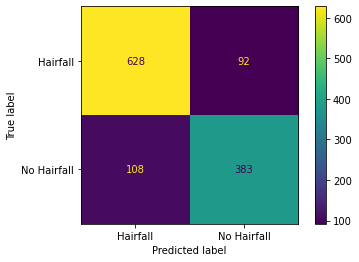

In [187]:
plot_confusion_matrix(dtree,X_test,y_test,values_format='d',display_labels=["Hairfall","No Hairfall"])

### **LOGISTIC REGRESSION**

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X = final_data.drop('Hairfall',axis=1)
y = final_data['Hairfall']

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=101)

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
lm=LogisticRegression(max_iter=250)
lm.fit(X_train,y_train)

LogisticRegression(max_iter=250)

In [193]:
predicted=lm.predict(X_test)

In [194]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [195]:
accuracy.append(accuracy_score(y_test,predicted))

In [196]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.71      0.87      0.78       720
           1       0.71      0.48      0.57       491

    accuracy                           0.71      1211
   macro avg       0.71      0.67      0.68      1211
weighted avg       0.71      0.71      0.70      1211



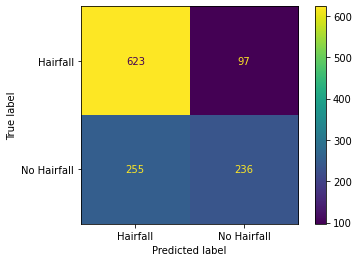

In [197]:
plot_confusion_matrix(lm,X_test,y_test,values_format='d',display_labels=["Hairfall","No Hairfall"])

### **SUPPORT VECTOR MACHINE**

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X = final_data.drop('Hairfall',axis=1)
y = final_data['Hairfall']

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=101)

In [201]:
from sklearn.svm import SVC

In [202]:
model = SVC()

In [203]:
model.fit(X_train,y_train)

SVC()

In [204]:
predictions = model.predict(X_test)

In [205]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [206]:
accuracy.append(accuracy_score(y_test,predictions))

In [207]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       720
           1       0.75      0.85      0.80       491

    accuracy                           0.82      1211
   macro avg       0.82      0.83      0.82      1211
weighted avg       0.83      0.82      0.83      1211



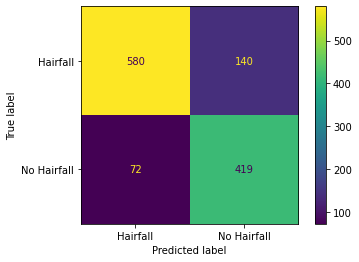

In [208]:
plot_confusion_matrix(model,X_test,y_test,values_format='d',display_labels=["Hairfall","No Hairfall"])

## **K-NEAREST NEIGHBORS**

In [209]:
final_data.head()

,Age,SerumIron,SerumFerritin,SerumZn,TSH,AbnormalHairShaft,Dandruff,Hairfall,Gender_M
0,41,130.00,135.00,90.00,2.75,0,0,1,1
1,39,162.71,201.39,29.46,0.63,1,0,0,1
2,22,104.79,87.68,82.50,2.70,0,0,0,0
3,25,72.65,37.93,91.91,3.26,0,0,0,1
4,37,173.04,30.50,184.93,4.18,0,0,1,1


***Standardize the variables as scale of variables matter for k-nn***

In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
scaler = StandardScaler()

In [212]:
scaler.fit(final_data.drop('Hairfall',axis=1))

StandardScaler()

In [213]:
scaled_features = scaler.transform(final_data.drop('Hairfall',axis=1))

In [214]:
final_data_feat=pd.DataFrame(data=scaled_features,columns=final_data.drop("Hairfall",axis=1).columns)
final_data_feat.head()

,Age,SerumIron,SerumFerritin,SerumZn,TSH,AbnormalHairShaft,Dandruff,Gender_M
0,0.678393,0.422587,0.880444,0.082744,0.039020,-0.590701,-0.601834,1.148492
1,0.457923,1.135982,1.955670,-1.118941,-0.753597,1.692903,-0.601834,1.148492
2,-1.416078,-0.127235,0.114069,-0.066127,0.020326,-0.590701,-0.601834,-0.870707
3,-1.085372,-0.828197,-0.691663,0.120656,0.229697,-0.590701,-0.601834,1.148492
4,0.237452,1.361276,-0.811996,1.967050,0.573663,-0.590701,-0.601834,1.148492


In [215]:
from sklearn.model_selection import train_test_split
X=final_data_feat
y=final_data['Hairfall']

In [216]:
X_test,X_train,y_test,y_train=train_test_split(X,y,test_size=0.35,random_state=101)

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
kn=KNeighborsClassifier(n_neighbors=6)

For choosing the right k value

In [219]:
error_rate = []

# Will take some time
for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

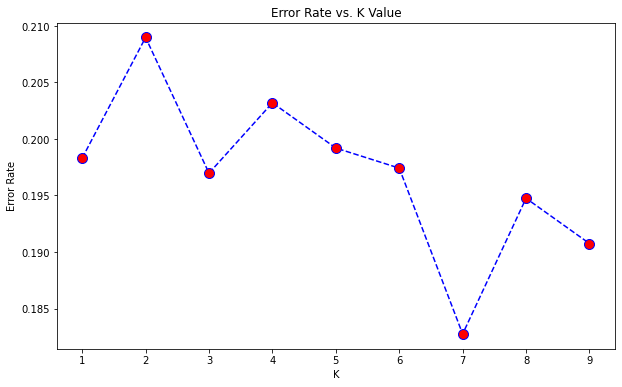

In [220]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [221]:
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [222]:
predicted=kn.predict(X_test)

In [223]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [224]:
accuracy.append(accuracy_score(y_test,predicted))

In [225]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1380
           1       0.79      0.66      0.72       869

    accuracy                           0.80      2249
   macro avg       0.80      0.78      0.78      2249
weighted avg       0.80      0.80      0.80      2249



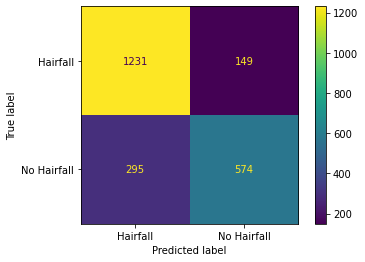

In [226]:
plot_confusion_matrix(kn,X_test,y_test,values_format='d',display_labels=["Hairfall","No Hairfall"])

### **NAIVE BAYES**

In [227]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3460 entries, 0 to 3
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                3460 non-null   int64  
 1   SerumIron          3460 non-null   float64
 2   SerumFerritin      3460 non-null   float64
 3   SerumZn            3460 non-null   float64
 4   TSH                3460 non-null   float64
 5   AbnormalHairShaft  3460 non-null   int64  
 6   Dandruff           3460 non-null   int64  
 7   Hairfall           3460 non-null   int64  
 8   Gender_M           3460 non-null   uint8  
dtypes: float64(4), int64(4), uint8(1)
memory usage: 375.7 KB


In [230]:
X_G=final_data[['Age', 'SerumIron','SerumFerritin','SerumZn','TSH']]
X_C=final_data[['AbnormalHairShaft', 'Dandruff','Gender_M']]
y=final_data['Hairfall']

In [231]:
X=np.c_[X_G, X_C]

In [232]:
X

array([[ 41.  , 130.  , 135.  , ...,   0.  ,   0.  ,   1.  ],
       [ 39.  , 162.71, 201.39, ...,   1.  ,   0.  ,   1.  ],
       [ 22.  , 104.79,  87.68, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [ 22.  ,  30.  , 100.  , ...,   1.  ,   1.  ,   1.  ],
       [ 30.  ,  99.  , 200.  , ...,   0.  ,   0.  ,   1.  ],
       [ 23.  ,  20.  , 100.  , ...,   0.  ,   0.  ,   1.  ]])

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.35,random_state=101)

In [234]:
model_G = GaussianNB()
clf_G = model_G.fit(X_train[:,0:5], y_train)

In [235]:
model_C = CategoricalNB()
clf_C = model_C.fit(X_train[:,5:8], y_train)

In [236]:
G_train_probas = model_G.predict_proba(X_train[:,0:5])
C_train_probas = model_C.predict_proba(X_train[:,5:8])

In [237]:
G_test_probas = model_G.predict_proba(X_test[:,0:5])
C_test_probas = model_C.predict_proba(X_test[:,5:8])

In [238]:
X_new_train = np.c_[(G_train_probas[:,1], C_train_probas[:,1])] # Train
X_new_test = np.c_[(G_test_probas[:,1], C_test_probas[:,1])] # Test

In [239]:
model = GaussianNB()
clf = model.fit(X_new_train, y_train)

In [240]:
pred_labels = model.predict(X_new_test)

In [241]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,accuracy_score

In [242]:
accuracy.append(accuracy_score(y_test, pred_labels))

In [243]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       720
           1       0.82      0.63      0.72       491

    accuracy                           0.80      1211
   macro avg       0.80      0.77      0.78      1211
weighted avg       0.80      0.80      0.79      1211



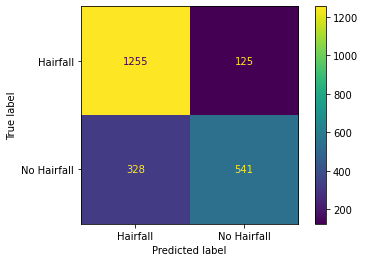

In [244]:
plot_confusion_matrix(model,X_new_train, y_train,values_format='d',display_labels=["Hairfall","No Hairfall"])

**Comparison of accuracy of different algorithms**

In [245]:
accuracy

[0.8348472336911643,
 0.7093311312964492,
 0.8249380677126342,
 0.8025789239662072,
 0.7968620974401321]

In [246]:
labels=['Decision Tree','Logistic Regression','SVM','K-NN','Naive Bayes']
d={'Algorithm':labels,'Accuracy':accuracy}

In [247]:
df = pd.DataFrame(d)
df

,Algorithm,Accuracy
0,Decision Tree,0.834847
1,Logistic Regression,0.709331
2,SVM,0.824938
3,K-NN,0.802579
4,Naive Bayes,0.796862


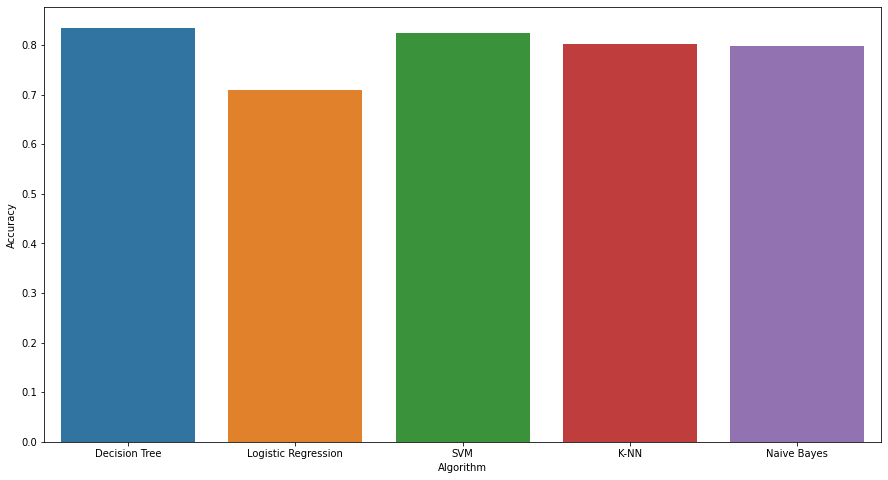

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.barplot(x = 'Algorithm',y = 'Accuracy',data = df)
plt.show()